### Testes básicos do funcionamento do CCScore

In [13]:
import sys
sys.path.append('../ccscore/')

import spacy
import pandas as pd
import pickle
from infernal import feature_extraction as fe
from infernal import datastructures as ds
import confapp as config
config.TEP2_PATH = "../ccscore/data/tep2.pickle"

import helper_palavras as h_pal 
from text_document import TextDocument
from matplotlib import pyplot as plt
import numpy as np

In [2]:
nlp = spacy.load('pt_core_news_lg')

In [3]:
PATH_CORPUS = "../ccscore/data/Corpus_Redacoes_Completo.pickle"

# Carrega a base de redações
df_redacao = pickle.load(open(PATH_CORPUS, 'rb'))
df_redacao

,Texto,Nota,Correção,Competência 1,Competência 2,Competência 3,Competência 4,Competência 5,Qtd palavras,Cadeias,Palavras,Erros,Entidades
0,Compreendemos como adolescentes sofrem variada...,350.0,~~Compreendemos~~ como adolescentes sofrem var...,50.0,100.0,100.0,50.0,50.0,417,"{'Cadeia_7': {'sn': [OrderedDict([('@id', '7')...",\nCompreendemos \t[compreender] <fmc> <*> <vH>...,[[space:EXTRA_BEFORE_RIGHT_PUNCT] Excesso de e...,{'preconceitos': {'label': 1654488180927486347...
1,"A questão do bullying na escola, é um fenômeno...",450.0,"A questão do bullying na escola, (Sem vírgula)...",100.0,100.0,100.0,100.0,50.0,268,"{'Cadeia_0': {'sn': [OrderedDict([('@id', '0')...",\nA \t[o] <*> <artd> DET F S @>N #1->2\nquest...,[[space:EXTRA_BEFORE_RIGHT_PUNCT] Excesso de e...,"{'pessoa': {'label': 16544881809274863474, 'kb..."
2,O tema que repercute o mundo desde muito tempo...,250.0,O tema (Qual? Deixe essa ideia evidente) que r...,50.0,50.0,50.0,50.0,50.0,291,"{'Cadeia_0': {'sn': [OrderedDict([('@id', '0')...",\nO \t[o] <*> <artd> DET M S @>N #1->2\ntema ...,[[space:EXTRA_BEFORE_RIGHT_PUNCT] Excesso de e...,{'língua inglesa': {'label': 16544881809274863...
3,Muito se tem falado sobre o bullying. Estudado...,400.0,Muito se tem falado sobre o bullying. Estudado...,100.0,100.0,50.0,100.0,50.0,416,"{'Cadeia_1': {'sn': [OrderedDict([('@id', '1')...",\nMuito \t[muito] <*> <quant> ADV @ADVL> #1->...,[[space:EXTRA_BEFORE_RIGHT_PUNCT] Excesso de e...,"{'lugar': {'label': 16544881809274863474, 'kb_..."
4,"Nossa história é feita de guerras, confrontos,...",250.0,"~~Nossa ~~história é feita de guerras, confron...",50.0,50.0,50.0,50.0,50.0,275,"{'Cadeia_2': {'sn': [OrderedDict([('@id', '2')...",\nNossa \t[nosso] <poss 1P> <*> DET F S @>N #...,[[space:EXTRA_BEFORE_RIGHT_PUNCT] Excesso de e...,{'classes sociais': {'label': 1654488180927486...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5071,"A busca pelo grande amor via internet, tem se ...",600.0,"A busca pelo grande amor via internet, tem se ...",150.0,100.0,100.0,100.0,150.0,367,"{'Cadeia_5': {'sn': [OrderedDict([('@id', '5')...",\nA \t[o] <*> <artd> DET F S @>N #1->2\nbusca...,[[space:EXTRA_AFTER_LEFT_PUNCT] Excesso de esp...,"{'estado': {'label': 16544881809274863474, 'kb..."
5072,Já estamos acostumados a nos esconder atrás de...,650.0,Já estamos acostumados a nos esconder atrás de...,150.0,150.0,100.0,150.0,100.0,344,"{'Cadeia_4': {'sn': [OrderedDict([('@id', '4')...",\nJá \t[já] <*> <setop> <atemp> ADV @ADVL> #1...,[[punctuation:BEFORE_SENTENCES] Pontuação no i...,"{'Internet': {'label': 7654241940133152407, 'k..."
5073,As salas de bate-papo estão entre as páginas d...,650.0,As salas de bate-papo estão entre as páginas d...,150.0,100.0,100.0,150.0,150.0,253,"{'Cadeia_0': {'sn': [OrderedDict([('@id', '0')...",\nAs \t[o] <*> <artd> DET F P @>N #1->2\nsala...,[[xml:124] O adjetivo na função de predicativo...,{'páginas da internet': {'label': 165448818092...
5074,No mundo globalizado em que vivemos a internet...,500.0,No mundo globalizado em que vivemos a internet...,150.0,100.0,100.0,100.0,50.0,315,"{'Cadeia_0': {'sn': [OrderedDict([('@id', '0')...",\nEm \t[em] <*> <sam-> PRP @ADVL> #1->7\no \t...,[[xml:118] Verificou-se erro de concordância e...,"{'Universidade de Cornell': {'label': 385, 'kb..."


In [36]:
num_redacao = 3919
texto = df_redacao['Texto'][num_redacao]
anot_pal = df_redacao['Palavras'][num_redacao]
nota_compt4 = df_redacao['Competência 4'][num_redacao]

print(f"Num.: {num_redacao}\nCompetência 4: {nota_compt4}")

tp = h_pal.parse_text_toclass(anot_pal, texto)                             
td = TextDocument(texto, tp)

Num.: 3919
Competência 4: 150.0


In [30]:
print(texto)

Jornais, novelas e anúncios publicitários, a televisão é uma mistura de informação e conteúdo de fácil acesso a um grande número de pessoas, seja para entreter ou polemizar há muito tempo ocupa um importante papel na vida dos brasileiros, e dessa forma é capaz de influenciá-los de diversas maneiras, podendo tanto promover o aprimoramento cultural quanto construir e induzir um posicionamento acerca de uma causa social; em relação a este último, surgem diversos questionamentos a respeito das consequências que tal meio de comunicação pode trazer: Seria a TV responsável por alienar as pessoas.
Com sua grande força de persuadir os telespectadores, a televisão e a mídia em geral podem criar padrões de consumo, idealizar comportamentos, e sensacionalizar o cotidiano de modo a formular opiniões e construir o senso comum, todavia, a autoridade das ferramentas midiáticas da TV não existem por mera coincidência, elas são resultado de um país com educação precária e cidadãos ineficientes, sendo po

In [6]:
print(anot_pal)


Atualmente 	[atualmente] <*> ADV @ADVL>  #1->5
$, #2->0
a 	[o] <artd> DET F S @>N  #3->4
imprensa 	[imprensa] <domain> <tool> <sem-r> <HH> N F S @SUBJ>  #4->5
constitui- 	[constituir] <fmc> <hyfen> <mv> V PR 3S IND VFIN @FS-STA  #5->0
se 	[se] <obj> PERS F 3S ACC @<ACC  #6->5
em 	[em] PRP @<ADVL  #7->5
um 	[um] <card> NUM M S @P<  #8->7
de 	[de] <sam-> <np-close> PRP @N<  #9->8
os 	[o] <-sam> <artd> DET M P @>N  #10->11
pilares 	[pilar] <part-build> N M P @P<  #11->9
sobre 	[sobre] <clb> PRP @ADVL>  #12->15
os=quais 	[o=qual] <clb-fs> <rel> SPEC M P @P<  #13->12
se 	[se] PERS M/F 3S/P ACC @SUBJ>  #14->15
fundamenta 	[fundamentar] <vH> <mv> <np-close> V PR 3S IND VFIN @FS-N<  #15->11
um 	[um] <arti> DET M S @>N  #16->17
Estado 	[Estado] <Lciv> <*> <newlex> PROP M S @<ACC  #17->15
democrático 	[democrático] <np-close> ADJ M S @N<  #18->17
$. #19->0

Salvo 	[salvo] <*> PRP @ADVL>  #1->7
países 	[país] <Lciv> N M P @P<  #2->1
em 	[em] PRP @SA>  #3->7
que 	[que] <clb-fs> <rel> SPEC M S @P<

In [7]:
#textdoc = nlp(texto)


In [8]:
len(td.sentences)

14

In [9]:
td.local_cohesion_values

[0.5, 0.0, 0.0, 0.0, 0.0, 0.5, 1.0, 1.0, 1.0, 0.5, 1.0, 0.5, 0.5]

In [10]:
td.global_cohesion_values

[0.5, 1.0, 1.0]

In [45]:
from itertools import tee

a,b = tee(list(range(len(td.local_cohesion_values))))
next(b)
l_sents = list(zip(a,b))
#list(combinations(, 2))
l_sents

[(0, 1), (1, 2), (2, 3), (3, 4)]

In [108]:
from itertools import combinations
from itertools import tee

def plot_coesao_local(td):
    
    fig, ax = plt.subplots()    
    y = td.local_cohesion_values
    x = [a+1 for a in list(range(len(td.local_cohesion_values)))]
    plt.ylim(0.0, 1.1)
    plt.yticks(np.arange(0, 1.5, 0.5))
    plt.xticks(np.arange(0, len(x)+1, 1.0))
    plt.xlabel("Pares de Sentenças")
    plt.ylabel("Valores Coesão Local")
    plt.plot(x, y, 'go-')
    
    a,b = tee(list(range(len(td.sentences))))
    next(b)
    pares_sentencas = list(zip(a,b))
    for i, p in enumerate(list(zip(x,y))):
        px, py = p
        ax.annotate(f"{pares_sentencas[i]}", xy=(px,py),
                    textcoords="offset points", 
                     xytext=(3,-15),
                     ha='center')
                  

Total de sentenças: 6


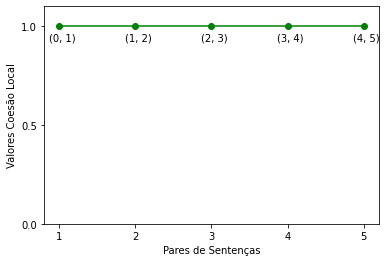

In [109]:
print(f"Total de sentenças: {len(td.sentences)}")
plot_coesao_local(td)

In [119]:
def plot_coesao_global(td): 
    
    fig, ax = plt.subplots()    
    y = td.global_cohesion_values
    x = [a+1 for a in list(range(len(td.global_cohesion_values)))]
    plt.ylim(0.0, 1.1)
    plt.yticks(np.arange(0, 1.5, 0.5))
    plt.xticks(np.arange(0, len(td.global_cohesion_values)+1, 1.0))
    plt.xlabel("Pares de Parágrafos")
    plt.ylabel("Valores Coesão Global")
    plt.plot(x, y, 'go-')
    
    pares_paragraphs = list(combinations(list(range(len(td.paragraphs))),2))
    for i, p in enumerate(list(zip(x,y))):
        px, py = p
        ax.annotate(f"{pares_paragraphs[i]}", xy=(px,py),
                    textcoords="offset points", 
                     xytext=(3,-15),
                     ha='center')

Total de parágrafos: 4


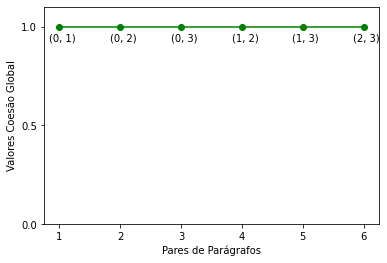

In [120]:
print(f"Total de parágrafos: {len(td.paragraphs)}")
plot_coesao_global(td)

In [26]:
td.sentences

[O sistema de cotas raciais, recentemente aprovado pelo Supremo Tribunal Federal (STF), exige que 50% das vagas das universidades públicas federais sejam destinadas a negros, em justificativa da aplicação da lei o Governo explica que simplificando a entrada de negros na educação superior é possível diminuir a diferença social e econômica entre raças existente na sociedade brasileira de hoje.,
 Com toda a certeza o sistema de cotas irá beneficiar os estudantes negros ou os simplesmente pardos que se dizem negros, sejam eles de escolas públicas ou particulares, só não é correto afirmar que a prática da lei em questão seja justa porque além de prejudicar os estudantes brancos de escola pública que tem poucas chances de ingressar no ensino superior também saíram prejudicados por um lado os próprios negros, isso porque ter mais chances de ocupar as vagas significa afirmar uma menor capacidade de consegui-las.,
 Embora pessoas brancas ocupem a maior parte dos cargos mais bem vistos pela soci

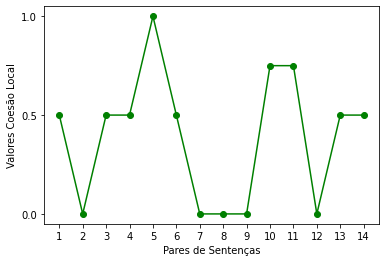

In [31]:
plt.yticks(np.arange(0, 1.5, 0.5))
plt.xticks(np.arange(0, len(td.local_cohesion_values)+1, 1.0))
plt.xlabel("Pares de Sentenças")
plt.ylabel("Valores Coesão Local")
plt.plot([x+1 for x in list(range(len(td.local_cohesion_values)))], td.local_cohesion_values, 'go-')




Listando:    
<ol>
    <li>Foco Explícito (FE)</li>
    <li>Lista intermediária do FE</li>    
    <li>Lista das Entidades Nomeadas</li>
    <li>Menções da DBPedia</li>
</ol>

In [10]:
for i, sent in enumerate(td.sentences):
    print()
    print("ID: ", str(i))    
    print("Texto Original: ", sent.text)    
    print()    
    print("Lista de Foco Explícito: ", [s for s in sent.list_fe])    
    print()
    print("Lista de Intermediária de FE: ", sent.list_fe_li)#[s for s in sent.list_fe_li])    
    print()    
    print("Lista de Entidades Nomeadas: ", sent.named_entities)    
    print()
    print("Lista de Menções DBPedia: ", str(sent.dbpedia_mentions))    
    
    print("-"*100)
    
#s_disp = td.nlp_processor(td.sentences[4].text)
#spacy.displacy.render(s_disp, style="dep", options = {"compact": True})    


ID:  0
Texto Original:  Compreendemos como adolescentes sofrem variadas cobranças, desde seus colegas de classe até dos mais velhos.

Lista de Foco Explícito:  ['cobranças', 'colegas', 'adolescentes', 'classe']

Lista de Intermediária de FE:  {'cobrança': {'recolhimento', 'arrecadação', 'exigência'}, 'colega': {'camarada', 'condiscípulo'}, 'adolescente': {'jovem', 'teenager'}, 'classe': {'série', 'estrato', 'plana', 'camada', 'distinção', 'ordem', 'camadasocial', 'aula', 'predicamento', 'grau', 'qualidade', 'sala', 'categoria', 'turma', 'grupo'}}

Lista de Entidades Nomeadas:  []

Lista de Menções DBPedia:  []
----------------------------------------------------------------------------------------------------

ID:  1
Texto Original:  Devendo modificar seus hábitos pois talvez não se encaixem nas características dos de mais.

Lista de Foco Explícito:  ['se', 'dos', 'hábitos', 'características']

Lista de Intermediária de FE:  {'hábito': {'costume', 'rotineira', 'veste', 'tenência', 'pa